In [26]:
import math
import pandas_datareader as web 
import numpy as np 
import pandas as pd 
from sklearn. preprocessing import MinMaxScaler 
from keras. models import Sequential 
from keras. layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [27]:
import yfinance as yf

# start_date = '2013-01-01'
# end_date = '2023-12-08'

start_date = '2020-01-01'
end_date = '2023-12-11'
symbol = 'NFLX'

df = yf.download(symbol, start=start_date, end=end_date)
print(df)


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  326.100006  329.980011  324.779999  329.809998  329.809998   
2020-01-03  326.779999  329.859985  325.529999  325.899994  325.899994   
2020-01-06  323.119995  336.359985  321.200012  335.829987  335.829987   
2020-01-07  336.470001  336.700012  330.299988  330.750000  330.750000   
2020-01-08  331.489990  342.700012  331.049988  339.260010  339.260010   
...                ...         ...         ...         ...         ...   
2023-12-04  460.989990  461.200012  451.200012  453.899994  453.899994   
2023-12-05  450.700012  456.390015  449.579987  455.149994  455.149994   
2023-12-06  460.000000  460.500000  445.730011  446.730011  446.730011   
2023-12-07  450.850006  452.890015  448.320007  452.000000  452.000000   
2023-12-08  450.760010  455.500000  450.760

In [28]:
df.shape

(992, 6)

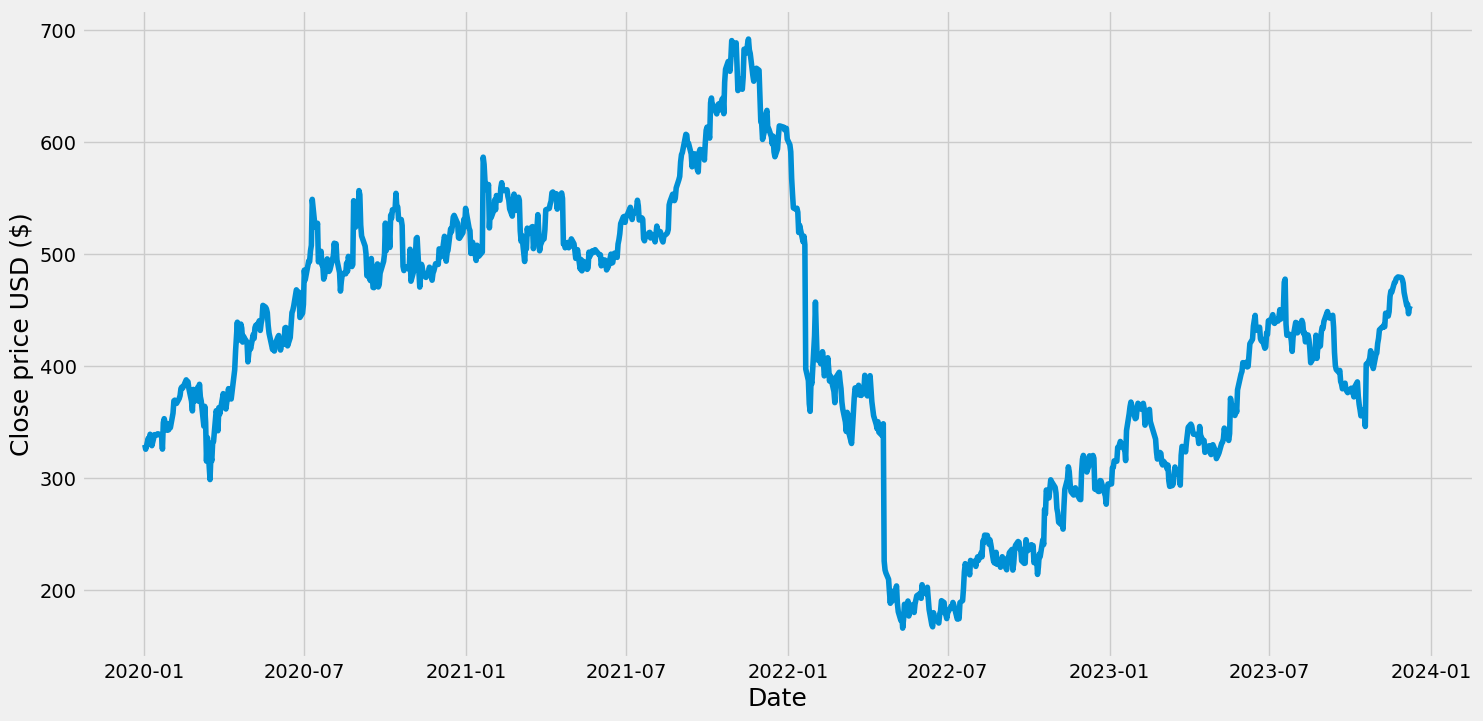

In [29]:
#closing price history
plt.figure(figsize = (16,8))
plt.title = ('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close price USD ($)',fontsize = 18)
plt.show()

In [30]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)

In [31]:
training_data_len

794

In [32]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [33]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.31112465, 0.30368156, 0.32258431, 0.31291404, 0.32911371,
       0.32226073, 0.30967789, 0.32846649, 0.32802864, 0.32875202,
       0.32789537, 0.32989419, 0.32692452, 0.30387193, 0.34879694,
       0.35557376, 0.33600473, 0.34674102, 0.33653774, 0.34525621,
       0.34021168, 0.36478718, 0.38574585, 0.38700224, 0.38182444,
       0.38148175, 0.38966727, 0.3946547 , 0.40668547, 0.40933145,
       0.40742785, 0.42147643, 0.41844971, 0.41808803, 0.40679968,
       0.38515574, 0.3687657 , 0.40521966, 0.39088554, 0.3857839 ,
       0.40866517, 0.38528895, 0.41388108, 0.39292241, 0.38566969,
       0.34287671, 0.37645627, 0.34940611, 0.28340821, 0.323479  ,
       0.2521701 , 0.29197442, 0.28382701, 0.31535065, 0.3168735 ,
       0.36910834, 0.36349275, 0.33507199, 0.37428613, 0.363112  ])]
[0.38945784185908816]



In [34]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [35]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(734, 60, 1)

In [36]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense (25)) 
model.add(Dense (1))



2023-12-14 22:44:38.585143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-14 22:44:38.586381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-14 22:44:38.587981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [37]:
class AutoRegressive():
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = LSTMCell(units)
        self.lstm_rnn = RNN(self.lstm_cell, return_state=True)
        self.dense = Dense(train_df.shape[1])

    def warmup(self, inputs):
        x, *state = self.lstm_rnn(inputs)
        prediction = self.dense(x)

        return prediction, state

    def call(self, inputs, training=None):
        predictions = []
        prediction, state = self.warmup(inputs)

        predictions.append(prediction)

        for n in range(1, self.out_steps):
            x = prediction
            x, state = self.lstm_cell(x, states=state, training=training)

            prediction = self.dense(x)
            predictions.append(prediction)

        predictions = tf.stack(predictions)
        predictions = tf.transpose(predictions, [1, 0, 2])

        return predictions

In [38]:
model.compile(optimizer = 'adam',loss='mean_squared_error')

In [47]:
model.fit(x_train,y_train, batch_size = 1, epochs=2)

Epoch 1/2
734/734 [==============================] - 14s 19ms/step - loss: 0.0017
Epoch 2/2
734/734 [==============================] - 13s 18ms/step - loss: 0.0015


In [48]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [49]:
x_test = np.array(x_test)

In [50]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [51]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 0s 28ms/step


In [52]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.15777387522687816

In [53]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/tmp/ipykernel_764954/2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


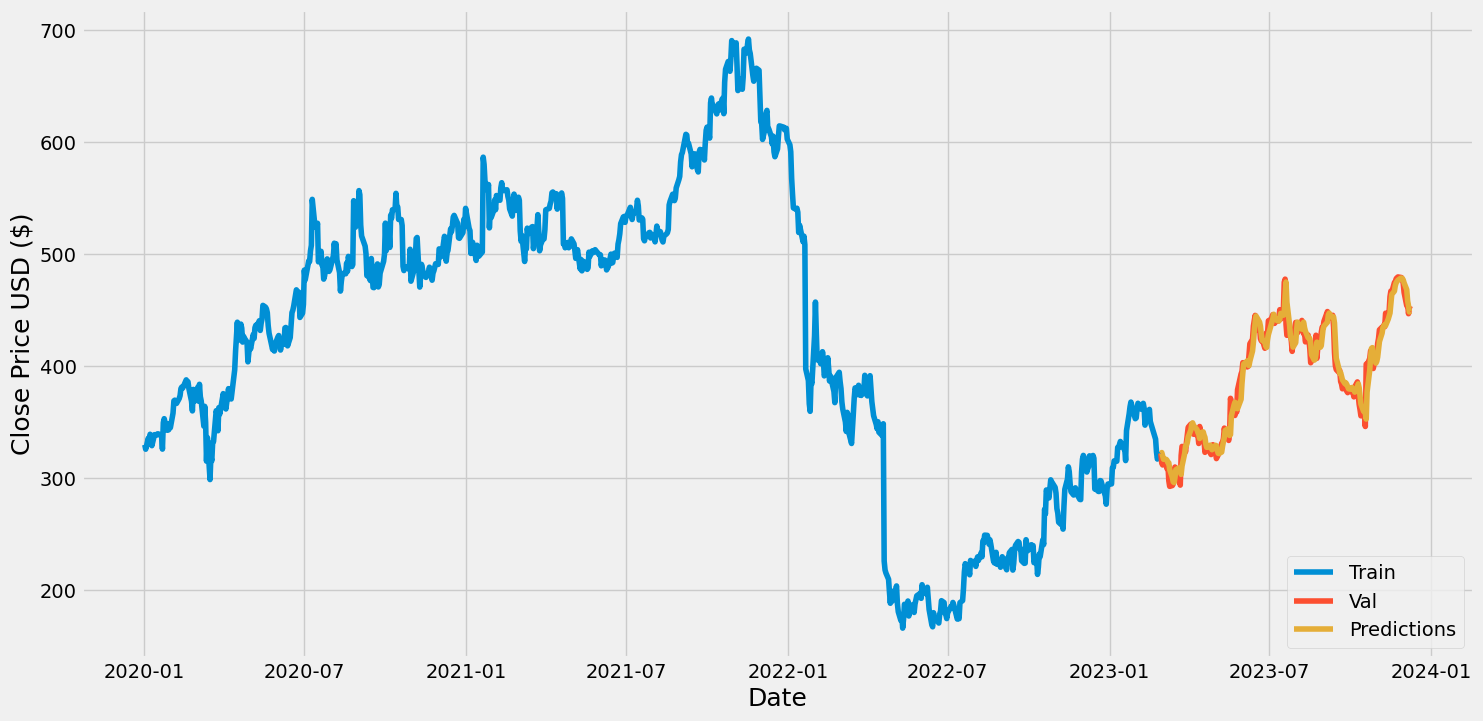

In [54]:
plt.figure(figsize=(16, 8))
#plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
